# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

In [3]:
"se declaran variables"
y = Function("y")
z = Function("z")
w = Function("w")
g= Function("g")
x = symbols('x')


In [92]:
"se declaran y(x)"
ecuacion1=Eq(y(x),sin(x))
ecuacion1

Eq(y(x), sin(x))

In [22]:
"se declaran z(x)"
ecuacion2=Eq(z(x),cos(x))
ecuacion2

Eq(z(x), cos(x))

In [35]:
"se declaran w(x)"
ecuacion3=Eq(w(x),1/(cos(x)+sin(2*x)))
ecuacion3

Eq(w(x), 1/(sin(2*x) + cos(x)))

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

In [31]:
"se declaran g(x)"
ecuacion4=Eq(g(x),y(x)*z(x))
ecuacion4

Eq(g(x), y(x)*z(x))

In [34]:
"se declaran la derivada g(x)"
Eq(diff(y(x)),diff(sin(x)*cos(x)))

Eq(Derivative(y(x), x), -sin(x)**2 + cos(x)**2)

(c) Grafica $w(x)$ en el rango $[0,1]$

Text(0.5, 1.0, 'gráfica de w(x)')

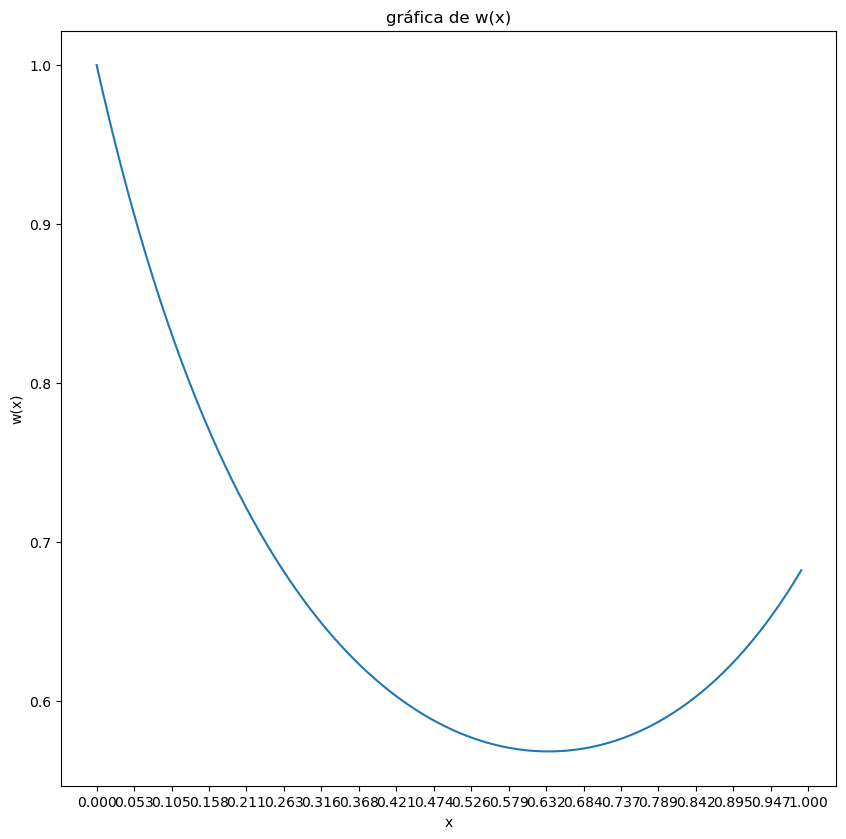

In [122]:
r = np.arange(0, 1, 0.01) #Definimos un intervalo en x
x1 = 0
w2=[]#Definimos los valores de w(x)
for x1 in r:
    w1 =1/(cos(x1)+sin(2*x1))
    w2.append(w1)
b=[0,1]
plt.figure(figsize=(10,10), dpi=100)#Definimos la figura
ax1 = plt.gca()#La malla
plt.plot(r,w2);#Graficamos
plt.xticks(np.linspace(0, 1, 20, endpoint=True))#los intervalos del eje X
ax1.set_xlabel('x')#Colocamos una etiqueta en el eje X
ax1.set_ylabel('w(x)')#Colocamos una etiqueta en el eje Y
ax1.set_title('gráfica de w(x)')#Colocamos una etiqueta en el eje Título

(d) Integra de manera indefinida $g(x)$ y luego evalúala desde $0$ a $1$.


In [93]:
integrate(sin(x)*cos(x), x)#integral de g(x)

sin(x)**2/2

In [95]:
integrate(sin(x)*cos(x), (x, 0, 1))#integral de g(x) evaluada

sin(1)**2/2

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

In [51]:
limit(sin(x), x, 0)#límite de y(x)

0

In [52]:
limit(cos(x), x, 0)#límite de z(x)

1

In [53]:
limit(sin(x)*cos(x), x, 0)#límite de g(x)

0

In [54]:
limit(1/(cos(x)+sin(2*x)), x, 0)#límite de w(x)

1

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [73]:
sin(x).series(x,0,3)#series de y(x) hasta orden 3

x + O(x**3)

In [4]:
cos(x).series(x,0,3)#series de z(x) hasta orden 3

1 - x**2/2 + O(x**3)

<div class="alert alert-info">
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [5]:
def funcion1(y, z):
    return (-y-z)
def funcion2(x, y,a):
    return (x+(a*y))
def funcion3(x,z,b,c):
    return (b + z*(x-c))
def RK2(x0,y0,z0, t, dt, funcion1,funcion2,funcion3):
    k0 = dt*funcion1(x0, t)
    k1 = dt*funcion1(x0 + k0, t + dt)
    l0 = dt*funcion2(y0, t)
    l1 = dt*funcion2(y0 + l0, t + dt)
    m0 = dt*funcion3(z0, t)
    m1 = dt*funcion3(z0 + m0, t + dt)
    x_next = x + 0.5*(k0 + k1)
    y_next = y + 0.5*(l0 + l1)
    z_next = z + 0.5*(m0 + m1)
    
    return y_next,x_next,z_next

In [6]:
a=0.13
b=0.2 
c=6.5 

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).